# Regularized Classification on Student Alcohol Dataset

We are going to use a dataset from Kaggle (https://www.kaggle.com/uciml/student-alcohol-consumption)
 
### Dataset description

>The data were obtained in a survey of students from the portuguese language courses in a secondary school. It contains a lot of interesting social, gender and study information about students.

> Have a look at the information about the dataset at the webpage: https://www.kaggle.com/uciml/student-alcohol-consumption

>In this context, we ask you to estimate which students are the most prone to alcohol consumption given some social and educational information. 

# TO DO: put your Surname, Name and ID number ("numero di matricola")


Student Name: Iriarte Delfina

ID Number: 1231682


In [1]:
import numpy as np
# The seed will be used as seed for splitting the data into training and test. 
# You can place your ID or also try different seeds to see the impact of the random subdvision of the train and test sets
# and of the random components in the algorithm on the results
IDnumber = 1231682
np.random.seed(IDnumber)

In [2]:
# let's load library for plotting
%matplotlib inline  
import matplotlib.pyplot as plt


from sklearn import metrics
from sklearn.metrics import accuracy_score

## Data Preprocessing

Load the data from a .csv file. In this notebook we use the pandas (Python Data Analysis Library) package, since it provides useful functions to clean the data. In particular, it allows us to remove samples with missing data, as we do below. We also plot some descriptions of columns, check the pandas documentation for 'describe()' if you want to know more.

In [3]:
# let's load pands and numpy
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# this time we use pandas to load and clean the dataset
# read the data from the csv file
df = pd.read_csv("data/student-data.csv", sep=',')

# let's see some statistics about the data 
df.describe()

,drink_alcohol,age,Medu,Fedu,traveltime,studytime,famrel,freetime,goout,health,absences,Marks
count,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000,649.000000
mean,0.454545,16.744222,2.514638,2.306626,1.568567,1.930663,3.930663,3.180277,3.184900,3.536210,3.659476,11.906009
std,0.498314,1.218138,1.134552,1.099931,0.748660,0.829510,0.955717,1.051093,1.175766,1.446259,4.640759,3.230656
min,0.000000,15.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000000,16.000000,2.000000,1.000000,1.000000,1.000000,4.000000,3.000000,2.000000,2.000000,0.000000,10.000000
50%,0.000000,17.000000,2.000000,2.000000,1.000000,2.000000,4.000000,3.000000,3.000000,4.000000,2.000000,12.000000
75%,1.000000,18.000000,4.000000,3.000000,2.000000,2.000000,5.000000,4.000000,4.000000,5.000000,6.000000,14.000000
max,1.000000,22.000000,4.000000,4.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,32.000000,19.000000


Now we create data matrices: many of the features are categorical, so we need to encode them with ***indicator matrices*** (i.e., using the so called one-hot encoding). That is, if a feature can take $\ell$ different values $v_1,\dots,v_{\ell}$, we create $\ell$ indicator (0-1) features $I_1,\dots,I_{\ell}$, such that $I_{j} = 1$ if and only if the value of the feature is $v_j$. This can be done in Python by first encode a feature with integers with LabelEncoder() and then obtain the indicator variables with OneHotEncoder().

In [4]:
#df.values contains the data, both the values of instances and the value of the label
Data = df.values

# the matrix including the categorical data is given by columns from the second one 
X_categorical = Data[:,1:]

# the target value (class) is in the first column
Y = Data[:,0]

print(list(df))

# get the number d of features of each sample
d = X_categorical.shape[1]

# get the number m of samples
m = X_categorical.shape[0]

#let's see what the number of samples is
print("Number of samples: {}".format(m))

#now encode categorical variables using integers and one-hot-encoder
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
label_encoder = LabelEncoder()
onehot_encoder = OneHotEncoder(categories='auto')

# encode the first column of the data matrix into indicator variables
X_tmp = label_encoder.fit_transform(X_categorical[:,0])
X_tmp = X_tmp.reshape(X_tmp.shape[0],1)
X = onehot_encoder.fit_transform(X_tmp[:,0].reshape(-1,1)).toarray()
print("Categorical feature:", df.columns[1], "   Number of categories:", X[1,:].shape)

# repeat for the other categorical input variables
index_categorical = [1,3,4,5,6,7,8,9,10,11,12,13,14,15,16]

for i in range(1,19):
    if i in index_categorical:
        X_tmp = label_encoder.fit_transform(X_categorical[:,i])
        X_tmp = X_tmp.reshape(X_tmp.shape[0],1)
        X_tmp = onehot_encoder.fit_transform(X_tmp[:,0].reshape(-1,1)).toarray()
        X = np.hstack((X,X_tmp))
        print("Categorical feature:", df.columns[i+1], "   Number of categories:", X_tmp[1,:].shape)
    else:
        X_tmp = X_categorical[:,i]
        X_tmp = X_tmp.reshape(X_tmp.shape[0],1)
        X = np.hstack((X,X_tmp))
        print("Valued feature:", df.columns[i+1])
        
print("Shape of X:", X.shape)
print("Sample element from X:", X[20,:])

['drink_alcohol', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian', 'traveltime', 'studytime', 'famrel', 'freetime', 'goout', 'health', 'absences', 'Marks']
Number of samples: 649
Categorical feature: school    Number of categories: (2,)
Categorical feature: sex    Number of categories: (2,)
Valued feature: age
Categorical feature: address    Number of categories: (2,)
Categorical feature: famsize    Number of categories: (2,)
Categorical feature: Pstatus    Number of categories: (2,)
Categorical feature: Medu    Number of categories: (5,)
Categorical feature: Fedu    Number of categories: (5,)
Categorical feature: Mjob    Number of categories: (5,)
Categorical feature: Fjob    Number of categories: (5,)
Categorical feature: guardian    Number of categories: (3,)
Categorical feature: traveltime    Number of categories: (4,)
Categorical feature: studytime    Number of categories: (4,)
Categorical feature: famrel    Number of categories:

## Data Preprocessing

The class labels are already 0-1, so we can use them directly.

In [5]:
# properly encode the target labels
Y = label_encoder.fit_transform(Y)
K = max(Y) + 1 # number of classes

print("Number of classes: "+str(K))

Number of classes: 2


Given $m$ total data points, keep $m\_training = 100$ data points as data for ***training and validation*** and $m\_test = m - m\_training$ as test data. Splitting is random, using as seed your ID number. Make sure that the training set contains at least 10 instances from each class.If it does not, modify the code so to apply a random
permutation (or the same permutation multiple times) to the samples until this happens.

In [6]:
# Split data into training and validation data
# load a package which is useful for the training-test splitting
# from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split

# number of samples
m = np.shape(X)[0]

#Divide in training and test: make sure that your training set
#contains at least 10 elements from class 1 and at least 10 elements
#from class -1! If it does not, modify the code so to apply more random
#permutations (or the same permutation multiple times) until this happens.
permutation = np.random.permutation(m)
X = X[permutation]
Y = Y[permutation]

m_training = 100 #  # use 100 samples for training + validation...
m_test = m-m_training # and the rest for testing

# test_size is the proportion of samples in the test set
X_training, X_test, Y_training, Y_test = train_test_split(X, Y, test_size =float(m_test)/float(m), random_state = IDnumber)

print(Y_training)

m_training = X_training.shape[0]
m_test = X_test.shape[0]

#let's see what the fraction of ones in the entire dataset is
print(float(sum(Y_training)+sum(Y_test))/float(m_training+m_test))

[1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1
 0 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 0 1 1 1 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 1
 0 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 0 1 0 0 1 1 0 1 0]
0.45454545454545453


Standardize the data to have zero-mean and unit variance (columnwise):

In [7]:
# Standardize the Features Matrix
from sklearn import preprocessing

X = X.astype(np.float64) #standard scaler works with double precision data
X_training = X_training.astype(np.float64)
X_test = X_test.astype(np.float64)

#let's use the standard scaling; we degine the scaling for the entire dataset
scaler = preprocessing.StandardScaler().fit(X)

#let's apply the scaling to the training set

X_training = scaler.transform(X_training)
#let's apply the scaling to the test set

X_test = scaler.transform(X_test)

### Perform Logistic Regression

We now perform logistic regression using the function provided by Scikit-learn.

Note: as provided by Scikit-learn, logistic regression is always implemented using regularization. However, the impact of regularization can be dampened to have almost no regularization by changing the parameter $C$, which is the inverse of $\lambda$. Therefore to have no regularization, which is $\lambda = 0$ for the model seen in class, we need $C$ to have a large value. Here we fix $C = 100000000$.

[Note that the intercept is estimated in the model.]

For all our models we are going to use 10-fold cross validation to estimate the parameters (when needed) and/or estimate the validation error.

In [8]:
from sklearn import linear_model

# define a logistic regression model with very high C parameter -> low impact from regularization;
# there are many solvers available to obtain the solution to the logistic regression problem, we just pick
# one of them; 'cv' is the number of folds in cross-validation; we also specify l2 as regularization penalty,
# just to pick one; Cs contains the values of C to be tested and to pick from with validation. Here we
# are interested in only 1 value of C, and use cross-validation just to estimate the validation error
# in a same way as other models

reg = linear_model.LogisticRegressionCV(Cs=[100000000], solver='newton-cg',cv=10, penalty='l2')

#fit the model on training data
reg.fit(X_training, Y_training)

# the attribute 'Cs_' contains ALL the values of C evaluated in cross-validation;
# let's print them
print("Values of parameter C tried in 10-fold Cross-Validation: {}".format( reg.Cs_ ))

# the attribute 'scores_' contains the accuracy obtained in each fold, for each value 
# of C tried; we now compute the average accuracy across the 10 folds
CV_accuracies = np.divide(np.sum(reg.scores_[1],axis=0),10)

# let's print the average accuracies obtained for the various values of C
print("Accuracies obtained for the different values of C with 10-fold Cross-Validation: {}".format( CV_accuracies ))

# the attribute 'C_' contains the best value of C as identified by cross-validation;
# let's print it
print("Best value of parameter C according to 10-fold Cross-Validation: {}".format( reg.C_[0] ))  #question: this is the same as we put.

# let's store the best CV accuracy, and then print it
print(type(reg.scores_))
reg_best_CV_accuracy = max(reg.scores_[1])
print("10-fold Cross-Validation accuracies obtained with the best value of parameter C: {}".format( reg_best_CV_accuracy ))

Values of parameter C tried in 10-fold Cross-Validation: [100000000]
Accuracies obtained for the different values of C with 10-fold Cross-Validation: [0.55151515]
Best value of parameter C according to 10-fold Cross-Validation: 100000000
<class 'dict'>
10-fold Cross-Validation accuracies obtained with the best value of parameter C: [0.72727273]


Note that the logistic regression function in Scikit-learn has many optional parameters. Read the documentation if you want to understand what they do!

## TODO 1
### Learn the best model from Logistic Regression on the entire training set and examine coefficients (by printing and plotting them)

Note that you can use simply $linear\_model.LogisticRegression()$, that does not use cross-validation, without passing the best value of $C$ (and then fit()).

Coefficients obtained using the entire training set: [[-1.04955379e+01  1.04955379e+01 -1.93961350e+01  1.93961350e+01
  -3.97887080e+01 -2.29857397e+00  2.29857397e+00 -1.68967042e+01
   1.68967042e+01 -1.77139430e+01  1.77139430e+01 -2.17953225e-01
  -1.17030478e+01  8.18958040e+00  1.17265551e+01 -8.20778350e+00
  -4.43686897e-01 -2.83650437e+01 -1.55671357e-01  2.84649673e+01
   3.16213922e+00  8.92185708e-01 -1.40111535e+01  1.84346744e+01
  -2.40199403e+01  1.29238315e+01  1.11246364e+00  7.50232161e-01
  -1.64728331e+01  3.04157818e+01 -2.57191694e+01  1.48266546e+01
  -1.85325250e+01  9.00427370e+00  2.85643826e+01 -2.35961351e+01
  -1.11530440e+01 -3.09746325e-02  4.46054350e+00 -1.49352178e+01
   1.14748263e+01  5.62651111e+00  1.24197638e+01 -7.21210426e+00
   3.12314031e+01  1.07880809e+01 -3.90256612e+01 -1.09932193e+01
  -1.09489784e+01 -2.25268976e+01  2.93305656e+01  1.54779862e+01
  -1.62438899e+00 -3.22168210e+01 -1.74974464e+01  3.11445882e+01
   2.43483642e+01  1.84

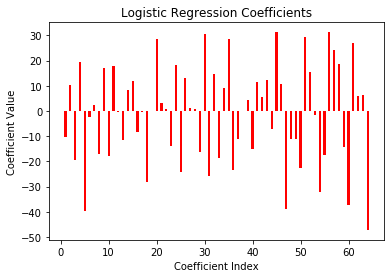

In [9]:
#Use a large C to disable regularization
reg_full =  linear_model.LogisticRegression(C = 1e10, solver='newton-cg',penalty='l2')
reg_full.fit(X_training, Y_training)
# ADD CODE!!

# print the coefficients from the logistic regression model.
print("Coefficients obtained using the entire training set: {}".format( reg_full.coef_ ))

# note that the intercept is not in coef_, it is in intercept_
print("Intercept: {}".format( reg_full.intercept_ ))

# Plot the coefficients
reg_coef = reg_full.coef_.reshape(reg_full.coef_.shape[1],)
plt.figure()
ind = np.arange(1,len(reg_coef)+1)  # the x locations for the groups
width = 0.45       # the width of the bars
plt.bar(ind, reg_coef, width, color='r')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients')
plt.show()

## TO DO 2

### Questions: How many coefficients do you get (recall that the one-hot encoding has been used for some of the features)? Why? How many of them are "close" to 0? What do negative coefficient values mean? (max 5 lines)


There is 64 coefficient that corresponds to the number of categorical features that we have. The one encoding is splitting the code in the number of categories that we have of each features (fro ex the feature Medu has been split into 5). The coefficients that are close to zero means that they have a lower variance (they don't correlate too much with the actual model). The negative coefficients are the uncorrelated values, meaning that their probability decreases if the feature itself increases. Features with positive coefficients increase the probability of the modeled outcome as they increase.

## TO DO 3
### Predict labels on training and test

- Compute the predicted labels on training and test data using reg.predict
 - Evaluate the accuracy using metrics.accuracy_score from scikit-learn (it returns the percentage of data correctly classified).
 - Evaluate the score used by logistic regression on training and test data using metrics.accuracy_score()

In [10]:
# prediction on training data
Y_training_prediction = reg_full.predict(X_training) 

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for training dataset
accuracy_training = accuracy_score(Y_training, Y_training_prediction)
print('Accuracy of the training model:', accuracy_training)

# prediction on test data
Y_test_prediction = reg_full.predict(X_test)

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for test dataset
accuracy_test = accuracy_score(Y_test, Y_test_prediction)
print('Accuracy of the test model:', accuracy_test)

#we are producing an overfitting here!. we perform a model that is the best for the training model and no for the test model!

Accuracy of the training model: 1.0
Accuracy of the test model: 0.604735883424408


In [11]:
from sklearn.metrics import classification_report
print('Report for training:\n====================')
print(classification_report(Y_training, Y_training_prediction))

print('Report for test:\n================')
print(classification_report(Y_test, Y_test_prediction))


Report for training:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        55
           1       1.00      1.00      1.00        45

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100

Report for test:
              precision    recall  f1-score   support

           0       0.66      0.58      0.61       299
           1       0.56      0.64      0.59       250

    accuracy                           0.60       549
   macro avg       0.61      0.61      0.60       549
weighted avg       0.61      0.60      0.61       549



In [12]:
from sklearn.metrics import confusion_matrix

print('Confusion Matrix for training:\n=============================')
confusion_matrix(Y_training, Y_training_prediction)


print('Confusion matrix for test:\n==========================')
confusion_matrix(Y_test, Y_test_prediction)

Confusion Matrix for training:
Confusion matrix for test:


array([[173, 126],
       [ 91, 159]], dtype=int64)

## TO DO 4
### Use L2 regularized logistic regression with cross-validation

We perform the L2 regularization for different values of the regularization parameter $C$, and use the Scikit-learn function to perform cross-validation (CV).

In L2 regularized logistic regression, the following L2 regularization term is added to the loss:

$$
    \lambda \sum_{i=1}^d w_i^2
$$

The parameter $C$ used by Scikit learn corresponds to the inverse of $\lambda$, that is $C = \frac{1}{\lambda}$.

Note: the CV in Scikit-learn is by default a *stratified* CV, that means that data is split into train-validation while maintaining the proportion of different classes in each fold.

In the code below:
- use LogisticRegressionCV() to select the best value of C with a 10-fold CV with L2 penalty;
- use LogisticRegression() to learn the best model for the best C with L2 penalty on the entire training set

Note that LogisticRegressionCV() picks some default values of C to try, but you may need to pass some other values in case for your dataset you need to explore a different interval of values. This applies every time that you use LogisticRegressionCV().

In [13]:
#let's try with different solver to see what happens
#in this part of the code I only change if it a differences in the accuracies if you changes your solver (but is not)
regL2 = linear_model.LogisticRegressionCV(Cs=[0.01], solver='newton-cg',cv=10, penalty='l2')
regL2.fit(X_training, Y_training)
CV_accuracies = np.divide(np.sum(regL2.scores_[1],axis=0),10)
print("Accuracies obtained for the different values of C with 10-fold Cross-Validation: {}".format( CV_accuracies ))

regL21 = linear_model.LogisticRegressionCV(Cs=[0.01], solver='sag',cv=10, penalty='l2')
regL21.fit(X_training, Y_training)
CV_accuracies = np.divide(np.sum(regL2.scores_[1],axis=0),10)
print("Accuracies obtained for the different values of C with 10-fold Cross-Validation: {}".format( CV_accuracies ))

regL22 = linear_model.LogisticRegressionCV(Cs=[0.01], solver='lbfgs',cv=10, penalty='l2')
regL22.fit(X_training, Y_training)
CV_accuracies = np.divide(np.sum(regL2.scores_[1],axis=0),10)
print("Accuracies obtained for the different values of C with 10-fold Cross-Validation: {}".format( CV_accuracies ))


Accuracies obtained for the different values of C with 10-fold Cross-Validation: [0.69292929]
Accuracies obtained for the different values of C with 10-fold Cross-Validation: [0.69292929]
Accuracies obtained for the different values of C with 10-fold Cross-Validation: [0.69292929]


In [14]:
#This part of the code is to see how the model behaves with different parameter of Cs.  In the first part 
#I perfom the .LogisticRegressionCV with diferents values of Cs, and then I perfom the .LogisticRegression and calculate the 
#acuracy of the train and test model with the best C. this will help me to chose the best value of Cs.

coefficients = [ [0.0001], [0.001], [0.01], [0.1], [1], [10], [100]]
for CS in coefficients:
    print(CS, '\n')
    regL2 = linear_model.LogisticRegressionCV(Cs=CS, solver='newton-cg',cv=10, penalty='l2')
    regL2.fit(X_training, Y_training)
    regL2_best_CV_accuracy = np.max(regL2.scores_[1])
    
    
    print("parameter C:",regL2.C_[0], 'with accuracy:', regL2_best_CV_accuracy)

    reg_trial = linear_model.LogisticRegression(C = regL2.C_[0], solver = 'newton-cg', penalty = 'l2')
    reg_trial.fit(X_training, Y_training)
    
    Y_training_prediction_LR = reg_trial.predict(X_training)

   # compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for training dataset
    accuracy_training = accuracy_score(Y_training, Y_training_prediction_LR)
    print('Accuracy of the training model with C=', regL2.C_[0], 'is:', accuracy_training)


    #prediction on test data
    Y_test_prediction_LR = reg_trial.predict(X_test)# COMPLETE


    # compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for test dataset
    accuracy_test = accuracy_score(Y_test, Y_test_prediction_LR)
    print('Accuracy of the test modelwith C=', regL2.C_[0], 'is:', accuracy_test)



[0.0001] 

parameter C: 0.0001 with accuracy: 0.5555555555555556
Accuracy of the training model with C= 0.0001 is: 0.55
Accuracy of the test modelwith C= 0.0001 is: 0.5446265938069217
[0.001] 

parameter C: 0.001 with accuracy: 0.5555555555555556
Accuracy of the training model with C= 0.001 is: 0.55
Accuracy of the test modelwith C= 0.001 is: 0.5446265938069217
[0.01] 

parameter C: 0.01 with accuracy: 0.8181818181818182
Accuracy of the training model with C= 0.01 is: 0.79
Accuracy of the test modelwith C= 0.01 is: 0.644808743169399
[0.1] 

parameter C: 0.1 with accuracy: 0.8181818181818182
Accuracy of the training model with C= 0.1 is: 0.83
Accuracy of the test modelwith C= 0.1 is: 0.6174863387978142
[1] 

parameter C: 1 with accuracy: 0.8181818181818182
Accuracy of the training model with C= 1 is: 0.9
Accuracy of the test modelwith C= 1 is: 0.6211293260473588
[10] 

parameter C: 10 with accuracy: 0.7272727272727273
Accuracy of the training model with C= 10 is: 0.97
Accuracy of the te

In [15]:
#define the model using LogisticRegressionCV passing an appropriate solver, cv value, and choice of penalty
regL2 = linear_model.LogisticRegressionCV(Cs=[0.01], solver='newton-cg',cv=10, penalty='l2')

#fit the model on training data
regL2.fit(X_training, Y_training)

# the attribute 'Cs_' contains ALL the values of C evaluated in cross-validation;
# let's print them
print("Values of parameter C tried in 10-fold Cross-Validation: {}".format( regL2.Cs_ ))

# the attribute 'scores_' contains the accuracy obtained in each fold, for each value 
# of C tried; we now compute the average accuracy across the 10 folds
CV_accuracies = np.divide(np.sum(regL2.scores_[1],axis=0),10)

# let's print the average accuracies obtained for the various values of C
print("Accuracies obtained for the different values of C with 10-fold Cross-Validation: {}".format( CV_accuracies ))

# the attribute 'C_' contains the best value of C as identified by cross-validation;
# let's print it

print("Best value of parameter C according to 10-fold Cross-Validation: {}".format( regL2.C_[0] ))

# let's store the best CV accuracy, and then print it
print(regL2.scores_[1])
regL2_best_CV_accuracy = np.max(regL2.scores_[1])
print("10-fold Cross-Validation accuracies obtained with the best value of parameter C: {}".format( regL2_best_CV_accuracy ))

#define the model using the best C and an appropriate solver
regL2_full =  linear_model.LogisticRegression(solver='newton-cg',penalty='l2', C = regL2.C_[0])#ADD CODE

#fit the model using the best C on the entire training set
regL2_full.fit(X_training, Y_training)

# print the coefficients from the logistic regression model.
print("Coefficients obtained using the entire training set: {}".format( regL2_full.coef_ ))

# note that the intercept is not in coef_, it is in intercept_
print("Intercept: {}".format( regL2_full.intercept_ ))


Values of parameter C tried in 10-fold Cross-Validation: [0.01]
Accuracies obtained for the different values of C with 10-fold Cross-Validation: [0.69292929]
Best value of parameter C according to 10-fold Cross-Validation: 0.01
[[0.72727273]
 [0.72727273]
 [0.81818182]
 [0.81818182]
 [0.72727273]
 [0.77777778]
 [0.66666667]
 [0.66666667]
 [0.44444444]
 [0.55555556]]
10-fold Cross-Validation accuracies obtained with the best value of parameter C: 0.8181818181818182
Coefficients obtained using the entire training set: [[-2.40618480e-02  2.40618480e-02 -9.36035936e-02  9.36035936e-02
   1.09749141e-02  8.32283849e-03 -8.32283849e-03 -1.89614577e-03
   1.89614577e-03 -2.97585941e-02  2.97585941e-02 -2.60199379e-02
   1.68804823e-02 -2.27521555e-02 -1.48250092e-02  2.67331235e-02
  -4.86335030e-02 -6.13006067e-02  6.45666584e-02  1.94684538e-02
  -1.45899456e-02 -2.44735490e-02 -2.84225695e-02  3.03362104e-02
  -3.13418504e-02  4.86580561e-02 -6.57702143e-03  3.28353114e-02
  -4.54808401e-0

In [16]:
#lET'S TRY TO SEE HOW THE MODEL BEHAVES WHEN WE CHANGE C
C = [regL2.C_[0]/10, regL2.C_[0],  regL2.C_[0]*10, regL2_best_CV_accuracy, regL2.C_[0]*100, regL2.C_[0]*1000]
j = 0
for i in C:
    reg_trial = linear_model.LogisticRegression(C = i, solver = 'newton-cg', penalty = 'l2')
    reg_trial.fit(X_training, Y_training)   

    Y_training_prediction_LR = reg_trial.predict(X_training)

    # compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for training dataset
    accuracy_training = accuracy_score(Y_training, Y_training_prediction_LR)
    print('Accuracy of the training model with C=', i, 'is:', accuracy_training)
    

    #prediction on test data
    Y_test_prediction_LR = reg_trial.predict(X_test)# COMPLETE


    # compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for test dataset
    accuracy_test = accuracy_score(Y_test, Y_test_prediction_LR)
    print('Accuracy of the test model:', accuracy_test)

#So the accuracy on the training model is better in the regL2.C_[0] as we are expecting, but because of the penalties 
#accuracy on the trainign model is worst
        


Accuracy of the training model with C= 0.001 is: 0.55
Accuracy of the test model: 0.5446265938069217
Accuracy of the training model with C= 0.01 is: 0.79
Accuracy of the test model: 0.644808743169399
Accuracy of the training model with C= 0.1 is: 0.83
Accuracy of the test model: 0.6174863387978142
Accuracy of the training model with C= 0.8181818181818182 is: 0.89
Accuracy of the test model: 0.6247723132969034
Accuracy of the training model with C= 1.0 is: 0.9
Accuracy of the test model: 0.6211293260473588
Accuracy of the training model with C= 10.0 is: 0.97
Accuracy of the test model: 0.6138433515482696


### TO DO 5: Print and plot the coefficients from logistic regression with and without regularization.

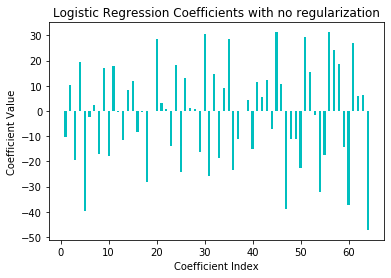

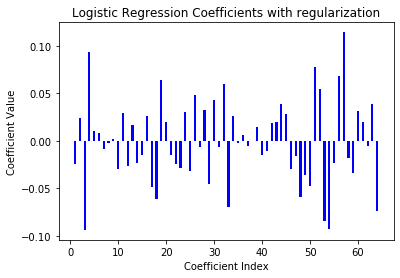

Intercept: [-0.2026141]


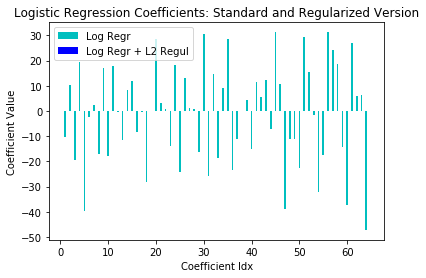

In [17]:
#print the coefficients from logistic regression
#Use a large C to disable regularization

reg_coef = reg_full.coef_.reshape(reg_full.coef_.shape[1],)
plt.figure()
ind = np.arange(1,len(reg_coef)+1)  # the x locations for the groups
width = 0.45       # the width of the bars
plt.bar(ind, reg_coef, width, color='c')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients with no regularization')
plt.show()


#print the coefficients from L2 regularized logistic regression
regL2_full_coef = regL2_full.coef_.reshape(regL2_full.coef_.shape[1],)
plt.figure()
ind = np.arange(1,len(regL2_full_coef)+1)  # the x locations for the groups
width = 0.45       # the width of the bars
plt.bar(ind, regL2_full_coef, width, color='b')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients with regularization')
plt.show()


# note that the intercept is not in coef_, it is in intercept_

print("Intercept: {}".format( regL2_full.intercept_ ))

# Plot the coefficients
regL2_full_coef = regL2_full.coef_.reshape(regL2.coef_.shape[1],)
ind = np.arange(1,len(reg_coef)+1)  # the x locations for the groups
width = 0.35       # the width of the bars
fig, ax = plt.subplots()

rects1 = ax.bar(ind, reg_coef, width, color='c')
rects2 = ax.bar(ind + width, regL2_full_coef, width, color='b')
ax.legend((rects1[0], rects2[0]), ('Log Regr', 'Log Regr + L2 Regul'))
plt.xlabel('Coefficient Idx')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients: Standard and Regularized Version')
plt.show()
#of course here we can barely see the bars with logistic regression

### TO DO 6: how do the coefficients from logistic regression with L2 regularization compare to the ones from logistic regression without regularization ? Why? (max 5 lines)

When we apply the regularization the coefficients tend to zero, reducing the variance in the model as we expected. Then the overfitting produced by a large amount of features is avoided since the coefficient of the features that were irrelevant are now close to zero. This 'shrink' of the coefficient can be seen easily in the graphs. 


### TO DO 7: obtain classification accuracy on training and test data for the L2 regularized model

In [18]:
# prediction on test data
# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for test dataset

# prediction on training data
Y_training_prediction_LR_L2 = regL2_full.predict(X_training) 

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for training dataset
accuracy_training = accuracy_score(Y_training, Y_training_prediction_LR_L2)
print('Accuracy of the training model:', accuracy_training)

# prediction on test data
Y_test_prediction_LR_L2 = regL2_full.predict(X_test)

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for test dataset
accuracy_test = accuracy_score(Y_test, Y_test_prediction_LR_L2)
print('Accuracy of the test model:', accuracy_test)

Accuracy of the training model: 0.79
Accuracy of the test model: 0.644808743169399


In [19]:
#with no regularization:
# prediction on training data
Y_training_prediction_LR = reg_full.predict(X_training)  

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for training dataset
accuracy_training = accuracy_score(Y_training, Y_training_prediction_LR)
print('Accuracy of the training model:', accuracy_training)

# prediction on test data
Y_test_prediction_LR = reg_full.predict(X_test)

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for test dataset
accuracy_test = accuracy_score(Y_test, Y_test_prediction_LR)
print('Accuracy of the test model:', accuracy_test)

Accuracy of the training model: 1.0
Accuracy of the test model: 0.604735883424408


### TO DO 8: How does training and test accuracies change when using regularization? Comment (max 5 lines)

We can see that the accuracy of the training model is worst for the regularization but that's something that we expect because with regularization we allow more error into the training set so that we could perform a better error in the test set (which is what we can see -the test model accuracy is better for regularization!).

### TO DO 9: Use larger datasets for training set

Perform the same estimation procedures using different more points on the training data, that is fix $m_{training} = 400$. You can simply copy and paste all the code you have written previously into the cell below.

In [20]:
# number of samples
m = np.shape(X)[0]

#Divide in training and test: make sure that your training set
#contains at least 10 elements from class 1 and at least 10 elements
#from class -1! If it does not, modify the code so to apply more random
#permutations (or the same permutation multiple times) until this happens.

permutation = np.random.permutation(m)
X = X[permutation]
Y = Y[permutation]

m_training = 400 #  # use 100 samples for training + validation...
m_test = m-m_training # and the rest for testing

# test_size is the proportion of samples in the test set
X_training, X_test, Y_training, Y_test = train_test_split(X, Y, test_size =float(m_test)/float(m), random_state = IDnumber)

print(Y_training)

m_training = X_training.shape[0]
m_test = X_test.shape[0]

#let's see what the fraction of ones in the entire dataset is
print(float(sum(Y_training)+sum(Y_test))/float(m_training+m_test))

[0 0 0 0 0 1 0 0 0 1 1 1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0
 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 1 1
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 1 1
 0 1 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 1 1 0 1 1 0 0 1 0
 0 0 0 1 0 1 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 1 0 0 1 0 0 1 0
 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1
 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 1 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1
 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 1 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0
 1 0 0 1 0 1 1 0 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 1 1 1 0 1 0 0 1 1 1 1
 1 1 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 1 1]
0.45454545454545453


In [21]:
# Standardize the Features Matrix
from sklearn import preprocessing

X = X.astype(np.float64) #standard scaler works with double precision data
X_training = X_training.astype(np.float64)
X_test = X_test.astype(np.float64)

#let's use the standard scaling; we degine the scaling for the entire dataset
scaler = preprocessing.StandardScaler().fit(X)

#let's apply the scaling to the training set

X_training = scaler.transform(X_training)
#let's apply the scaling to the test set

X_test = scaler.transform(X_test)

In [22]:
#Use a large C to disable regularization
reg_full =  linear_model.LogisticRegression(C = 1e8,solver='newton-cg',penalty='l2')
reg_full.fit(X_training, Y_training)
# ADD CODE!!

# print the coefficients from the logistic regression model.
print("Coefficients obtained using the entire training set: {}".format( reg_full.coef_ ))

# note that the intercept is not in coef_, it is in intercept_
print("Intercept: {}".format( reg_full.intercept_ ))


Coefficients obtained using the entire training set: [[-1.12647586e-01  1.12647586e-01 -2.63605086e-01  2.63605086e-01
   1.29349744e-01 -1.20343709e-02  1.20343709e-02 -1.95104927e-01
   1.95104927e-01 -7.64398760e-02  7.64398760e-02  6.20633625e-02
   2.14162784e-02 -2.30243832e-01  2.56955991e-01 -3.63310516e-02
  -1.39632999e+00  6.16374283e-02  1.53012971e-01  1.01383480e-01
   1.19079281e-02 -7.27512526e-04  8.50246403e-04 -1.35189688e-01
   3.30678231e-02  1.68041578e-01 -2.09673872e-01 -3.47029380e-01
   2.10098594e-01  6.66485414e-02 -7.98948677e-02  1.66465152e-01
  -1.43042479e-01 -2.12757574e-02 -2.73359501e-03  5.59338003e-03
  -1.09018883e-02  1.12221389e-02 -1.38928203e-02 -1.07122697e-01
   2.36316700e-01 -1.07477056e-01  2.29877053e-01  7.74396611e-02
   1.66797187e-01  6.06139235e-02 -3.31395447e-01  2.50173619e-01
  -4.83830832e-02  1.07597082e-02 -7.54645172e-02 -5.60614455e-02
  -4.07996903e-01 -2.89029849e-01 -9.94729068e-02  1.98521145e-01
   5.10526586e-01 -2.00

In [23]:
coefficients = [ [0.0001], [0.001], [0.01], [0.1], [1], [10], [100]]
for CS in coefficients:
    print(CS, '\n')
    regL2 = linear_model.LogisticRegressionCV(Cs=CS, solver='newton-cg',cv=10, penalty='l2')
    regL2.fit(X_training, Y_training)
    regL2_best_CV_accuracy = np.max(regL2.scores_[1])
    
    
    print("parameter C:",regL2.C_[0], 'with accuracy:', regL2_best_CV_accuracy)

    reg_trial = linear_model.LogisticRegression(C = regL2.C_[0], solver = 'newton-cg', penalty = 'l2')
    reg_trial.fit(X_training, Y_training)
    
    Y_training_prediction_LR = reg_trial.predict(X_training)

   # compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for training dataset
    accuracy_training = accuracy_score(Y_training, Y_training_prediction_LR)
    print('Accuracy of the training model with C=', regL2.C_[0], 'is:', accuracy_training)


    #prediction on test data
    Y_test_prediction_LR = reg_trial.predict(X_test)# COMPLETE


    # compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for test dataset
    accuracy_test = accuracy_score(Y_test, Y_test_prediction_LR)
    print('Accuracy of the test modelwith C=', regL2.C_[0], 'is:', accuracy_test)



[0.0001] 

parameter C: 0.0001 with accuracy: 0.55
Accuracy of the training model with C= 0.0001 is: 0.5475
Accuracy of the test modelwith C= 0.0001 is: 0.5421686746987951
[0.001] 

parameter C: 0.001 with accuracy: 0.725
Accuracy of the training model with C= 0.001 is: 0.6725
Accuracy of the test modelwith C= 0.001 is: 0.6626506024096386
[0.01] 

parameter C: 0.01 with accuracy: 0.8
Accuracy of the training model with C= 0.01 is: 0.76
Accuracy of the test modelwith C= 0.01 is: 0.6867469879518072
[0.1] 

parameter C: 0.1 with accuracy: 0.75
Accuracy of the training model with C= 0.1 is: 0.755
Accuracy of the test modelwith C= 0.1 is: 0.6586345381526104
[1] 

parameter C: 1 with accuracy: 0.75
Accuracy of the training model with C= 1 is: 0.7575
Accuracy of the test modelwith C= 1 is: 0.6706827309236948
[10] 

parameter C: 10 with accuracy: 0.75
Accuracy of the training model with C= 10 is: 0.7575
Accuracy of the test modelwith C= 10 is: 0.6666666666666666
[100] 

parameter C: 100 with a

In [24]:
#define the model using LogisticRegressionCV passing an appropriate solver, cv value, and choice of penalty

regL2 = linear_model.LogisticRegressionCV(Cs=[0.01], solver='newton-cg',cv=10, penalty='l2')

#fit the model on training data
regL2.fit(X_training, Y_training)

# the attribute 'Cs_' contains ALL the values of C evaluated in cross-validation;
# let's print them
print("Values of parameter C tried in 10-fold Cross-Validation: {}".format( regL2.Cs_ ))

# the attribute 'scores_' contains the accuracy obtained in each fold, for each value 
# of C tried; we now compute the average accuracy across the 10 folds
CV_accuracies = np.divide(np.sum(regL2.scores_[1],axis=0),10)

# let's print the average accuracies obtained for the various values of C
print("Accuracies obtained for the different values of C with 10-fold Cross-Validation: {}".format( CV_accuracies ))

# the attribute 'C_' contains the best value of C as identified by cross-validation;
# let's print it

print("Best value of parameter C according to 10-fold Cross-Validation: {}".format( regL2.C_[0] ))

# let's store the best CV accuracy, and then print it
print(regL2.scores_[1])
regL2_best_CV_accuracy = np.max(regL2.scores_[1])
print("10-fold Cross-Validation accuracies obtained with the best value of parameter C: {}".format( regL2_best_CV_accuracy ))

#define the model using the best C and an appropriate solver

bestC = regL2.C_[0] 
print('MIRA ACAAAA', bestC)

regL2_full =  linear_model.LogisticRegression(solver='newton-cg',penalty='l2', C = regL2.C_[0])#ADD CODE


#fit the model using the best C on the entire training set
regL2_full.fit(X_training, Y_training)

# print the coefficients from the logistic regression model.
print("Coefficients obtained using the entire training set: {}".format( regL2_full.coef_ ))

# note that the intercept is not in coef_, it is in intercept_
print("Intercept: {}".format( regL2_full.intercept_ ))


Values of parameter C tried in 10-fold Cross-Validation: [0.01]
Accuracies obtained for the different values of C with 10-fold Cross-Validation: [0.6751454]
Best value of parameter C according to 10-fold Cross-Validation: 0.01
[[0.63414634]
 [0.65      ]
 [0.7       ]
 [0.7       ]
 [0.65      ]
 [0.65      ]
 [0.625     ]
 [0.65      ]
 [0.8       ]
 [0.69230769]]
10-fold Cross-Validation accuracies obtained with the best value of parameter C: 0.8
MIRA ACAAAA 0.01
Coefficients obtained using the entire training set: [[-0.04673141  0.04673141 -0.14633707  0.14633707  0.08090655  0.00855745
  -0.00855745 -0.0922388   0.0922388  -0.03594905  0.03594905  0.01831226
   0.00991253 -0.08496553  0.09147752 -0.01120105 -0.11894876 -0.00765533
   0.03233153  0.02764242 -0.02644983  0.00359047 -0.01185143 -0.04098657
   0.02676764  0.03441551 -0.05189955 -0.09353172  0.05401134  0.03054475
  -0.04547806  0.04635934 -0.06612332  0.04354058 -0.00902574  0.00955877
  -0.00357404  0.0062847   0.0150

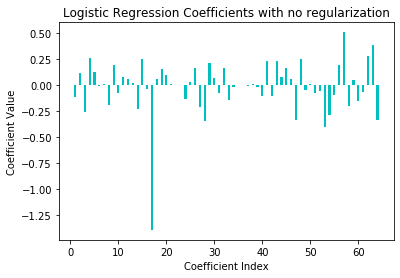

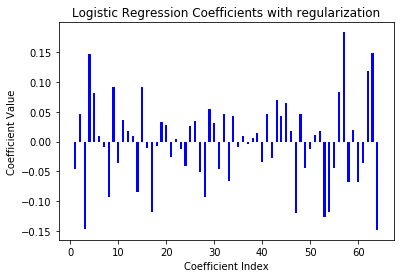

Intercept: [-0.18897393]


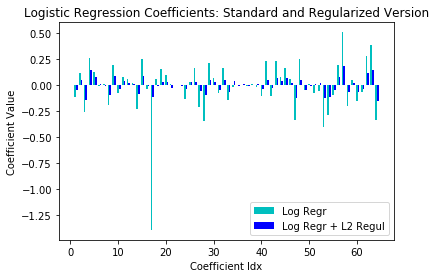

In [25]:
#print the coefficients from logistic regression
#Use a large C to disable regularization

reg_coef = reg_full.coef_.reshape(reg_full.coef_.shape[1],)
plt.figure()
ind = np.arange(1,len(reg_coef)+1)  # the x locations for the groups
width = 0.45       # the width of the bars
plt.bar(ind, reg_coef, width, color='c')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients with no regularization')
plt.show()


#print the coefficients from L2 regularized logistic regression
regL2_full_coef = regL2_full.coef_.reshape(regL2_full.coef_.shape[1],)
plt.figure()
ind = np.arange(1,len(regL2_full_coef)+1)  # the x locations for the groups
width = 0.45       # the width of the bars
plt.bar(ind, regL2_full_coef, width, color='b')
plt.xlabel('Coefficient Index')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients with regularization')
plt.show()


# note that the intercept is not in coef_, it is in intercept_

print("Intercept: {}".format( regL2_full.intercept_ ))

# Plot the coefficients
regL2_full_coef = regL2_full.coef_.reshape(regL2.coef_.shape[1],)
ind = np.arange(1,len(reg_coef)+1)  # the x locations for the groups
width = 0.35       # the width of the bars
fig, ax = plt.subplots()

rects1 = ax.bar(ind, reg_coef, width, color='c')
rects2 = ax.bar(ind + width, regL2_full_coef, width, color='b')
ax.legend((rects1[0], rects2[0]), ('Log Regr', 'Log Regr + L2 Regul'))
plt.xlabel('Coefficient Idx')
plt.ylabel('Coefficient Value')
plt.title('Logistic Regression Coefficients: Standard and Regularized Version')
plt.show()

In [26]:
# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for test dataset

# prediction on training data
Y_training_prediction_LR_L2 = regL2_full.predict(X_training) 

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for training dataset
accuracy_training = accuracy_score(Y_training, Y_training_prediction_LR_L2)
print('Accuracy of the training model:', accuracy_training)

# prediction on test data
Y_test_prediction_LR_L2 = regL2_full.predict(X_test)# COMPLETE

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for test dataset
accuracy_test = accuracy_score(Y_test, Y_test_prediction_LR_L2)
print('Accuracy of the test model:', accuracy_test)

Accuracy of the training model: 0.76
Accuracy of the test model: 0.6867469879518072


In [27]:
#with no regularization:
# prediction on training data
Y_training_prediction = reg_full.predict(X_training)  

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for training dataset
accuracy_training = accuracy_score(Y_training, Y_training_prediction)
print('Accuracy of the training model:', accuracy_training)

# prediction on test data
Y_test_prediction = reg_full.predict(X_test)# COMPLETE

# compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for test dataset
accuracy_test = accuracy_score(Y_test, Y_test_prediction)
print('Accuracy of the test model:', accuracy_test)

Accuracy of the training model: 0.7575
Accuracy of the test model: 0.6666666666666666


In [28]:
#this is only for plotting some things with different m, so that we can see that the accuracy tends to the same one.
size = [100, 150, 200, 250, 300, 350, 400, 500]

acc_train_LR = [[], [], [], [], [], [], [], []]


acc_train = [[], [], [], [], [], [], [], []]

acc_test = [[], [], [], [], [], [], [],[]]

acc_test_LR = [[], [], [], [], [], [], [],[]]

j = 0
for i in size:

    m = np.shape(X)[0]

    permutation = np.random.permutation(m)
    X = X[permutation]
    Y = Y[permutation]

    m_training = i 
    m_test = m-m_training # and the rest for testing

    # test_size is the proportion of samples in the test set
    X_training, X_test, Y_training, Y_test = train_test_split(X, Y, test_size =float(m_test)/float(m), random_state = IDnumber)

    m_training = X_training.shape[0]
    m_test = X_test.shape[0]

    X = X.astype(np.float64) #standard scaler works with double precision data
    X_training = X_training.astype(np.float64)
    X_test = X_test.astype(np.float64)

    scaler = preprocessing.StandardScaler().fit(X)

    X_training = scaler.transform(X_training)
    X_test = scaler.transform(X_test)


    #nonr
    reg_full =  linear_model.LogisticRegression(C = 1e8,solver='newton-cg',penalty='l2')
    reg_full.fit(X_training, Y_training)

    #with no regularization:
    # prediction on training data
    Y_training_prediction = reg_full.predict(X_training)  

    # compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for training dataset
    accuracy_training = accuracy_score(Y_training, Y_training_prediction)
    #print('Accuracy of the training model:', accuracy_training)
    acc_train[j] = accuracy_training
    #teste[j].append(accuracy_test)
    
    
    # prediction on test data
    Y_test_prediction = reg_full.predict(X_test)# COMPLETE

    # compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for test dataset
    accuracy_test = accuracy_score(Y_test, Y_test_prediction)
    #print('Accuracy of the test model:', accuracy_test)
    acc_test[j] = accuracy_test
    
    #regularization
    regL2 = linear_model.LogisticRegressionCV(Cs=[0.01], solver='newton-cg',cv=10, penalty='l2')
    regL2.fit(X_training, Y_training)

    # prediction on training data
    Y_training_prediction_LR_L2 = regL2_full.predict(X_training) 

    # compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for training dataset
    accuracy_training = accuracy_score(Y_training, Y_training_prediction_LR_L2)
    #print('Accuracy of the training model:', accuracy_training)
    acc_train_LR[j] = accuracy_training
    
    
    # prediction on test data
    Y_test_prediction_LR_L2 = regL2_full.predict(X_test)# COMPLETE

    # compute accuracy as suggested above using metrics.accuracy_score from scikit-learn for test dataset
    accuracy_test = accuracy_score(Y_test, Y_test_prediction_LR_L2)
    #print('Accuracy of the test model:', accuracy_test)
    acc_test_LR[j] = accuracy_test
    
    
    j += 1


[0.71, 0.7266666666666667, 0.75, 0.732, 0.7433333333333333, 0.7257142857142858, 0.74, 0.718]
[1.0, 0.8, 0.8, 0.8, 0.7866666666666666, 0.7314285714285714, 0.755, 0.722]
[0.7358834244080146, 0.7334669338677354, 0.7238307349665924, 0.731829573934837, 0.7220630372492837, 0.7391304347826086, 0.7188755020080321, 0.7785234899328859]
[0.5282331511839709, 0.6472945891783567, 0.623608017817372, 0.6691729323308271, 0.6590257879656161, 0.68561872909699, 0.6666666666666666, 0.697986577181208]


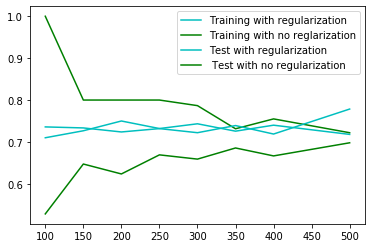

In [29]:
print(acc_train_LR)
print(acc_train)
print(acc_test_LR)
print(acc_test)



#here i plot the values obtaing for the accuracy with the different C. It can be seen that with different Cs the model gives 
# me different values of accuracy. I will chose the Cs  that improve the accuracy on the test set.

plt.plot(size, acc_train_LR, c = 'c', label= 'Training with regularization')
plt.plot(size, acc_train, c = 'g', label=  'Training with no reglarization')
plt.plot(size, acc_test_LR, c =  'c', label= 'Test with regularization')
plt.plot(size, acc_test, c ='g', label= ' Test with no regularization')
plt.legend()



### TO DO 10: Discuss all the questions above for the larger set (max 7 lines). Compare the impact of regularization in this case with the results you obtained for the smaller set.





The training accuracies are better when we don’t apply the regularization. We can see that with larger samples the accuracy of the training error is better for m larger (but really similar).This improve can also be seen for the test accuracy. Nevertheless, it seems that both of the solutions (for the regularized and the non regularized) converge to the same value with larger samples, thus with a huge training data using regularization is not so relevant (see graph above)

The coefficients are worst for m larger because the dataset itself is too unstable (this lead us to get different values with different seeds)

